In [1]:
from sympy.solvers import solve
from sympy import symbols, simplify#, abs
from cmath import phase
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Variables used 
vo, vr, vc, vl, vi, i, r, c, l, omega = symbols("vo vr vc vl vi i r c l omega")

In [3]:
#Circuit equation for RC low pass filter
eq1_LP = (vo-vc,
 vr+vc-vi,
 vc - i/(1j*omega*c),
 vr - i*r)

#Circuit equation for RC high pass filter
eq1_HP = (vo-vr,
 vr+vc-vi,
 vc - i/(1j*omega*c),
 vr - i*r)

#Circuit equation for RLC low pass filter
eq2_LP = (vo-vc,
 vc+vl+vr-vi,
 vc - i/(1j*omega*c),
 vr - i*r,
 vl - 1j*omega*l*i)

#Circuit equation for RLC high pass filter
eq2_HP = (vo-vl,
 vc+vl+vr-vi,
 vc - i/(1j*omega*c),
 vr - i*r,
 vl - 1j*omega*l*i)


In [7]:
sol1_LP = solve(eq1_LP, (vo, vr, vc, i))
sol1_HP = solve(eq1_HP, (vo, vr, vc, i))
sol2_LP = solve(eq2_LP, (vo, vr, vc, vl, i))
sol2_HP = solve(eq2_HP, (vo, vr, vc, vl, i))
H1_LP = simplify(sol1_LP[vo])/vi #transfer function of RC Low pass
H1_HP = simplify(sol1_HP[vo])/vi #transfer function of RC High pass
H2_LP = simplify(sol2_LP[vo])/vi #transfer function of RLC Low pass
H2_HP = simplify(sol2_HP[vo])/vi #transfer function of RLC High pass
print('Transfer function of RC low pass filter:', H1_LP)
print('Transfer function of RC high pass filter:', H1_HP)
print('Transfer function of RLC low pass filter:', H2_LP)
print('Transfer function of RLC high pass filter:', H2_HP)

Transfer function of RC low pass filter: -I/(c*omega*r - I)
Transfer function of RC high pass filter: c*omega*r/(c*omega*r - I)
Transfer function of RLC low pass filter: -I/(I*c*l*omega**2 + c*omega*r - I)
Transfer function of RLC high pass filter: I*c*l*omega**2/(I*c*l*omega**2 + c*omega*r - I)


In [39]:
#1st order RC circuit
#We set capacitance = 0.01e-6, resistance = 15e3, and inductance = 0

def plot1(eq,n,C=.01e-6,R=15e3,L=0): 
    numvalue = {c:C, r:R, l:L}
    cutoff = 1/(numvalue[c]*numvalue[r]) #cutoff angular frequency
    print('cutoff frequency = ', cutoff)
    Hnum = eq.subs(numvalue) #substitute c and r numvalue
    w = np.linspace(1, 1000000, 1000) #angular frequency list
    w_axis = np.log10(w/cutoff) #x-axis of amplitude and phase response
    vos_abs = [abs(Hnum.subs({omega: o})) for o in w]
    abs_axis = 20*np.log10(np.array(vos_abs, dtype=np.float64)) #y-axis of amplitude response
    phase_axis = [phase(Hnum.subs({omega: o})) for o in w] #y-axis of phase response

    #Bode Amplitude Plot
    plt.plot(w_axis, abs_axis)
    plt.xlabel('Log(w/wc)')
    plt.ylabel('|H| in dB')
    plt.title('Bode Amplitude Plot')
    plt.xlim(-2,2)
    plt.ylim(-41,5)
    plt.yticks(np.array([0,-3,-20,-40]))
    plt.xticks(np.array([-2,-1,0,1,2]))
    plt.grid(True)
    plt.rc('font', size=12)
    if n == 1: #for low pass RC filter
        plt.savefig('AmpRC_LP.png')
    elif n == 2: #for high pass RC filter
        plt.savefig('AmpRC_HP.png')
    plt.show()
    
    #Bode Phase Plot
    plt.plot(w_axis, phase_axis)
    plt.xlabel('Log(w/wc)')
    plt.ylabel('Phase in radians')
    plt.title('Bode Phase Plot')
    plt.xticks(np.array([0,-np.pi/2, np.pi/2, -np.pi, np.pi]))
    if n == 1: #for low pass RC filter
        plt.yticks(np.array([0,-np.pi/2, -np.pi/4]))
    elif n == 2: #for high pass RC filter
        plt.yticks(np.array([0,np.pi/2, np.pi/4]))
    plt.xlim(-2,2)
    plt.grid(True)
    plt.rc('font', size=12)
    if n == 1: #for low pass RC filter
        plt.savefig('PhaseRC_LP.png')
    elif n == 2: #for high pass RC filter
        plt.savefig('PhaseRC_HP.png')
    plt.show()

1st Order Low Pass RC Circuit
cutoff frequency =  6666.666666666666


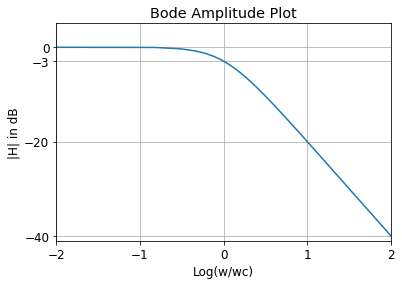

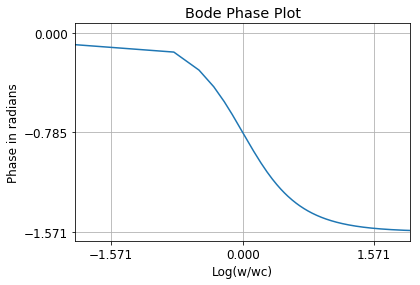

1st Order High Pass RC Circuit
cutoff frequency =  6666.666666666666


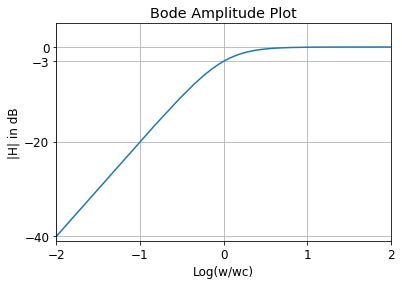

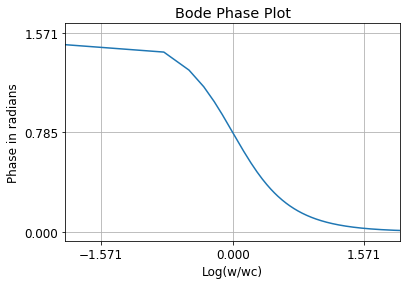

In [40]:
print('1st Order Low Pass RC Circuit')
plot1(H1_LP,1)
print('1st Order High Pass RC Circuit')
plot1(H1_HP,2)

In [41]:
#2nd order RLC circuit
#We set capacitance = 1e-9 and inductance = 1e-3
def plot2(eq,i,C=1e-9,L=1e-3):
    numvalue = {c:C, l:L} 
    Hnum = eq.subs(numvalue) #substitute c and l numvalue
    dlist = [0.4,0.6,0.7,1.0] #Damping Ratio List
    Qlist = [] #Quality Factor List
    Rlist = [] #Resistance  Values List
    for d in dlist:
        Q = 1/(2*d) #solves for Quality Factor 
        R = 1/Q*np.sqrt(L/C) #solves for resistance values
        Rlist.append(R)
        Qlist.append(Q)
    Hnum = [Hnum.subs({r:R})for R in Rlist] #substitute r value
    print('Q=', Qlist,'and R=', Rlist)
    w = np.linspace(10000, 50000000, 500) #angular frequency list
    wo = 1/(np.sqrt(1e-9*1e-3)) #solves for undamped resonant frequency
    print('undamped resonant frequency = ', wo)
    w_axis = np.log10(w/wo) #x-axis of amplitude and phase response
    vos_abs = [[abs(h.subs({omega: o})) for o in w]
                                        for h in Hnum]
    abs_axis = 20*np.log10(np.array(vos_abs, dtype=np.float64)) #y-axis of amplitude response
    phase_axis = [[phase(h.subs({omega: o})) for o in w] #y-axis of phase response
                                             for h in Hnum]

    #Bode Amplitude Plot
    plt.plot(w_axis, abs_axis[0],label='d=0.4')
    plt.plot(w_axis, abs_axis[1],label='d=0.6')
    plt.plot(w_axis, abs_axis[2],label='d=0.7')
    plt.plot(w_axis, abs_axis[3],label='d=1.0')
    plt.xlim(-2,1.6)
    plt.yticks(np.array([0,-20,-40,-60]))
    plt.xlabel('Log(w/wc)')
    plt.ylabel('|H| in dB')
    plt.title('Bode Amplitude Plot')
    plt.grid(True)
    if i == 1: #for low pass RLC filter
        plt.legend(loc = 'lower left')
    elif i == 2: #for high pass RLC filter
        plt.legend(loc = 'lower right')
    plt.rc('font', size=12)
    if i == 1: #for low pass RLC filter
        plt.savefig('AmpRLC_LP.png')
    elif i == 2: #for high pass RLC filter
        plt.savefig('AmpRLC_HP.png')
    plt.show()
    
    #Bode Phase Plot
    plt.plot(w_axis, phase_axis[0],label='d=0.4')
    plt.plot(w_axis, phase_axis[1],label='d=0.6')
    plt.plot(w_axis, phase_axis[2],label='d=0.7')
    plt.plot(w_axis, phase_axis[3],label='d=1.0')
    plt.xticks(np.array([-np.pi, -np.pi/2, 0, np.pi, np.pi/2]))
    if i == 1: # for RLC low pass filter
        plt.yticks(np.array([-np.pi, -np.pi/2, 0]))
    elif i == 2: #for RLC high pass filter
        plt.yticks(np.array([np.pi, np.pi/2, 0]))
    plt.xlim(-2,1.6)
    plt.xlabel('Log(w/wc)')
    plt.ylabel('Phase in radians')
    plt.title('Bode Phase Plot')
    plt.grid(True)
    plt.legend()
    plt.rc('font', size=12)
    if i == 1: #for low pass RLC filter
        plt.savefig('PhaseRLC_LP.png')
    elif i == 2: #for high pass RLC filter
        plt.savefig('PhaseRLC_HP.png')
    plt.show()

Low Pass Filter
Q= [1.25, 0.8333333333333334, 0.7142857142857143, 0.5] and R= [800.0, 1200.0, 1400.0, 2000.0]
undamped resonant frequency =  999999.9999999999


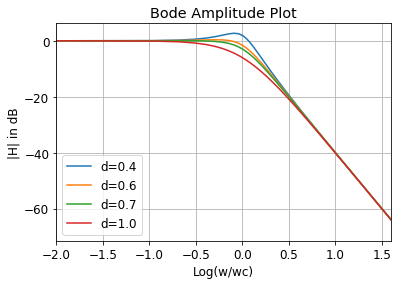

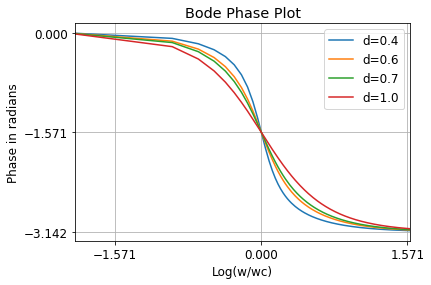

High Pass Filter
Q= [1.25, 0.8333333333333334, 0.7142857142857143, 0.5] and R= [800.0, 1200.0, 1400.0, 2000.0]
undamped resonant frequency =  999999.9999999999


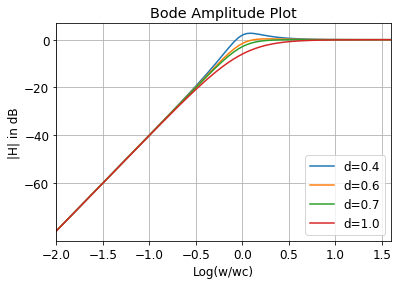

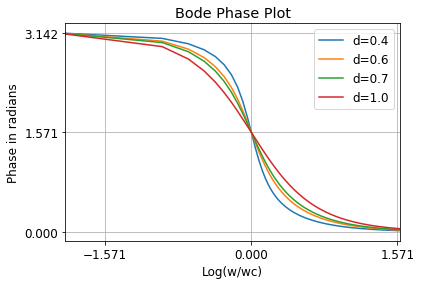

In [42]:
print('Low Pass Filter')
plot2(H2_LP, 1)

print('High Pass Filter')
plot2(H2_HP, 2)